<a href="https://colab.research.google.com/github/NaziBaramaki/ImageDenoising/blob/main/Compare%20different%20boundry%20conditions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from google.colab import files
uploaded = files.upload()

Saving office_noisy.png to office_noisy.png


In [8]:
# Load the "noisy office" image
img = Image.open('office_noisy.png')
img_array = np.array(img, dtype=float)

In [9]:
# Diffusion PDE parameters
D = 1.0  # Diffusion coefficient
t_list = [1, 5, 10, 30, 100]  # Diffusion times

In [10]:
# Boundary conditions
# using Dirichlet boundary conditions, where the boundary values are fixed
# there are other boundary conditions, such as Neumann or periodic

# Finite difference scheme
nx, ny = img_array.shape
dx, dy = 1.0, 1.0  # Assuming a unit grid
dt = 0.1 * min(dx**2, dy**2) / D  # Time step constraint for stability

To solve the diffusion PDE with the given initial condition and parameters, we can use a numerical method such as the finite difference method like the next cell.We Applied Dirichlet boundary conditions, where the boundary values are fixed at 0.

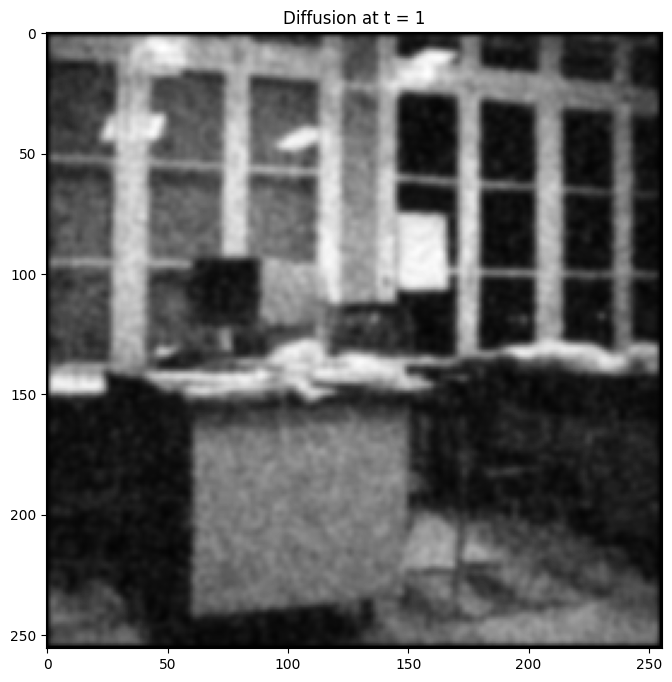

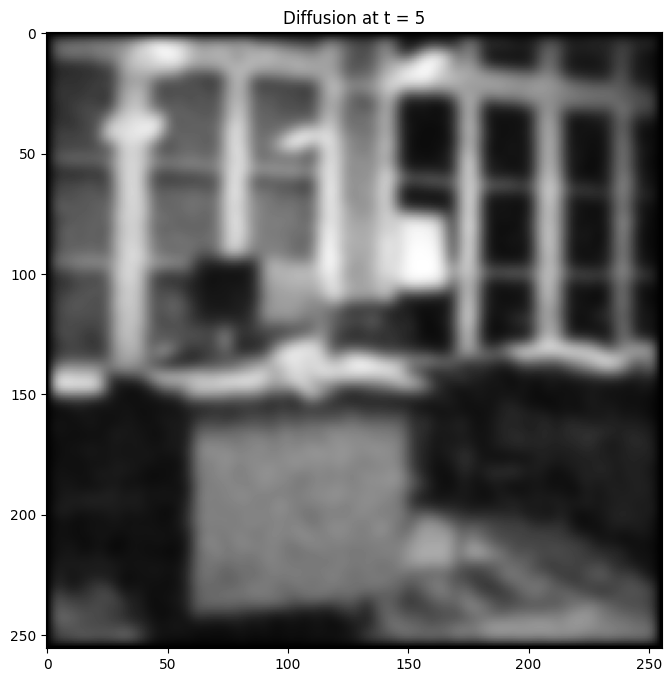

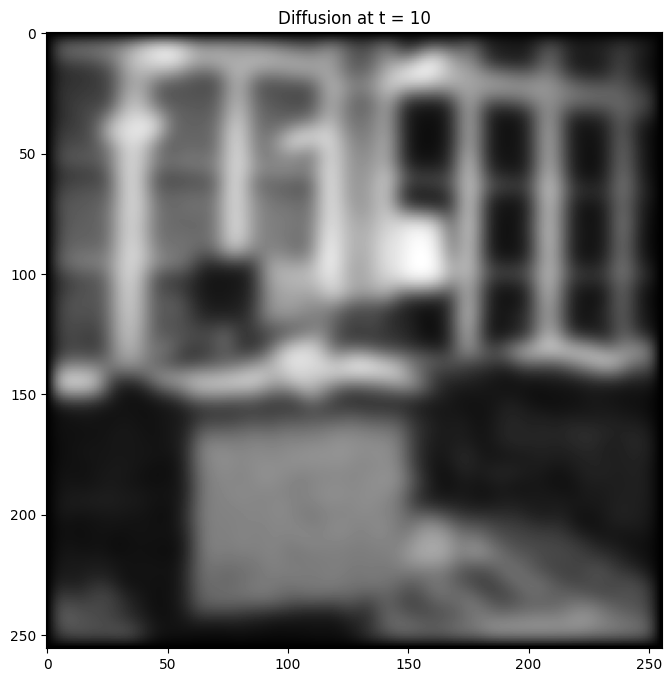

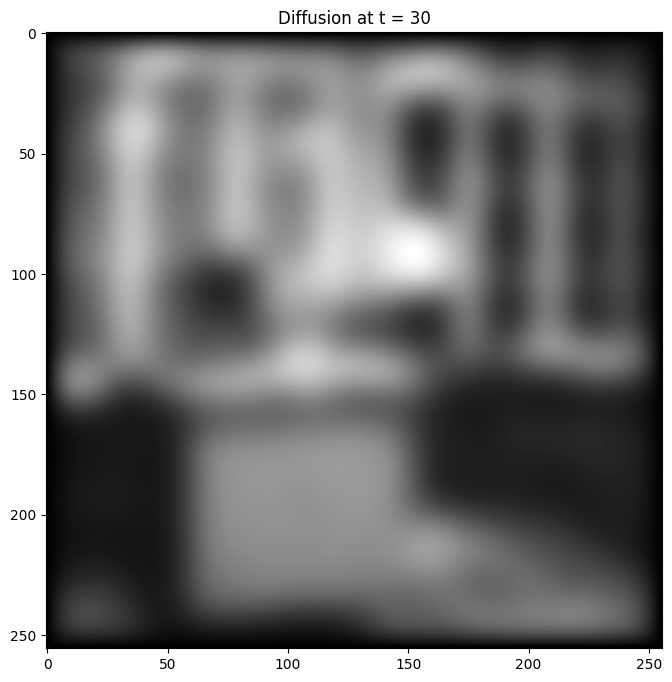

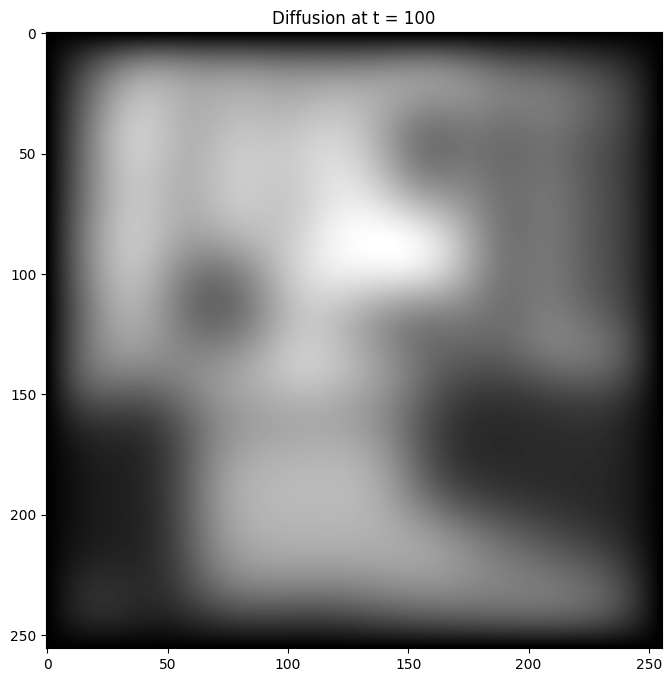

In [11]:
# Iterate over the diffusion times
for t in t_list:
    num_steps = int(t / dt)
    u = img_array.copy()  # Initial condition

    for _ in range(num_steps):
        # Compute the Laplacian using finite differences
        u_xx = (u[2:, 1:-1] - 2 * u[1:-1, 1:-1] + u[:-2, 1:-1]) / dx**2
        u_yy = (u[1:-1, 2:] - 2 * u[1:-1, 1:-1] + u[1:-1, :-2]) / dy**2
        u[1:-1, 1:-1] += D * dt * (u_xx + u_yy)

        # Apply Dirichlet boundary conditions
        u[0, :] = u[-1, :] = u[:, 0] = u[:, -1] = 0

    # Plot the result
    plt.figure(figsize=(8, 8))
    plt.imshow(u, cmap='gray')
    plt.title(f'Diffusion at t = {t}')
    plt.show()

we can use this equation:∂u/∂n = d∇^2(u) as another way of calculating the PDE. where “u” is the function representing the image, “t” is the diffusion time and t = {1, 5, 10, 30, 100}, and “d” is the diffusion coefficient and d = 1.

Boundary Conditions:
For this problem, the most appropriate boundary conditions would be Neumann boundary conditions, where the normal derivative of the function “u” is set to zero at the image boundaries. This ensures that there is no flux of the quantity “u” across the boundaries, which is a reasonable assumption for many image processing applications, that we show in next cell.

Output image after diffusion time t = 1:


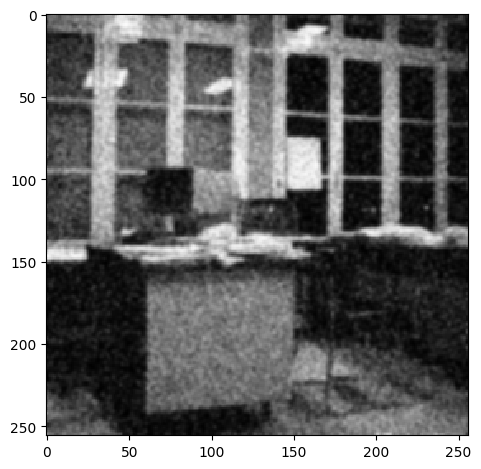

Output image after diffusion time t = 5:


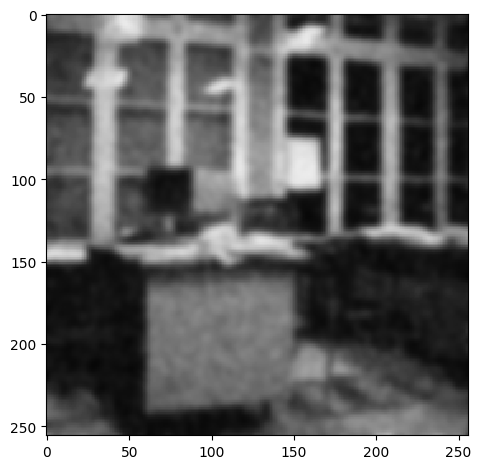

Output image after diffusion time t = 10:


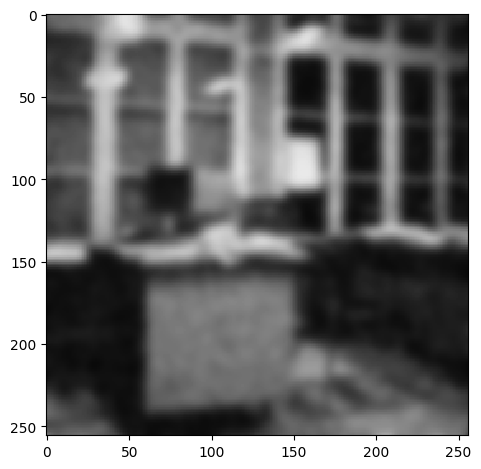

Output image after diffusion time t = 30:


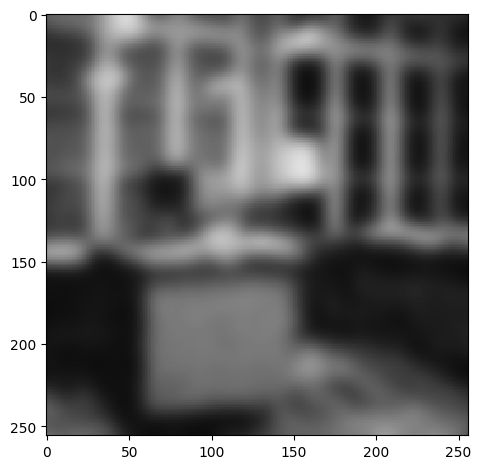

Output image after diffusion time t = 100:


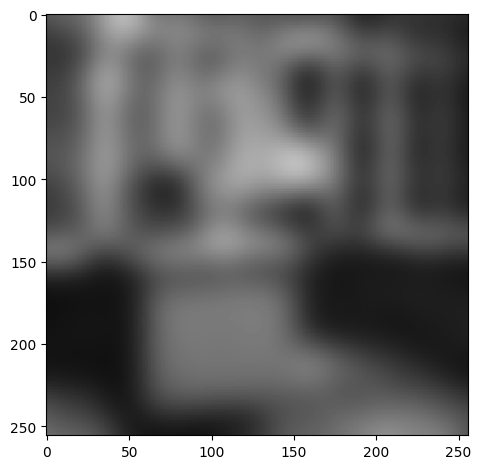

In [13]:
from skimage.filters import gaussian
from skimage.io import imread, imshow, show

# Load the initial "noisy office" image
initial_image = imread('office_noisy.png')

# Solve the diffusion PDE for the given diffusion times
for t in [1, 5, 10, 30, 100]:
    output_image = gaussian(initial_image, sigma=np.sqrt(t))
    print(f"Output image after diffusion time t = {t}:")
    imshow(output_image)
    show()